In [4]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [5]:
def excVWN(n):
  # Constants
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;

    rs=(4*pi/3*n)**(-1/3); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return out


def excVWNp(n):
  # Constants
    Mp = 1800 #1836.152
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;
 
    rs=1/((4*pi/3*(n / Mp**3 ))**(1/3)); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return Mp * out

In [6]:
#crear densidad gaussiana 3d protones y electrones 



S=[300, 300, 300];


a=5.66/0.52917721; # Lattice constant (converted from angstroms to bohrs)

R=a*np.diag(np.ones(3)); # Cubic lattice

# Code fragment to create columns of m1, m2, m3 indices
ms=np.arange(0,np.prod(S)).T; # Count from zero to S1*S2*s3-1 in a column vector
m1=ms%S[0];
m2=floor(ms/S[0])%S[1];
m3=floor(ms/(S[0]*S[1]))%S[2];



# Wrap indices to +/- Fourier convention
n1=m1-(m1>S[0]/2)*S[0];
n2=m2-(m2>S[1]/2)*S[1];
n3=m3-(m3>S[2]/2)*S[2];

# Gather indices into columns of a matrices
N=[n1, n2, n3];
M=[m1, m2, m3];


## Compute Cartesian coords of grid points
r=np.dot((R.T),np.dot(inv(diag(S)),M)); # Scale by 1/S(), mult by real-space vectors (L's)

# Compute reciprocal-space vectors and lengths
G=2*pi*np.dot(inv(R.T),N);
G2=sum( G**2, axis=1);

dr=r-np.dot(np.mat(diag(R)).T,np.ones([prod(S),1]).T)/2;
dr=np.sqrt(np.sum(np.array(dr)**2,0))

#print(shape(dr),shape(M))

sig=1
Sig=1/4
psi1=(1/(2*pi*sig**2)**(3/4))*exp(-dr**2/(4*sig**2))
psi2=(1/(2*pi*Sig**2)**(3/4))*exp(-dr**2/(4*Sig**2))

0.9999997322602728 normalization electron gaussian
0.9999999999999998 normalization proton gaussian


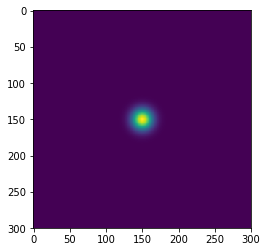

In [7]:
#probar densidad gaussiana
plt.imshow(reshape(psi2,S)[30,:,:])
print(np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S),"normalization electron gaussian")
print(np.sum(psi2*np.conj(psi2))*np.linalg.det(R)/np.prod(S),"normalization proton gaussian")

In [8]:
# crear transformada de fourier inversa 3d en array compacto (necesita inicializar lattice )
Psit1=np.fft.fftn(reshape(psi1,S), axes=(0, 1, 2))
np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S)
# Operador de overlap
O=np.linalg.det(R)
ndens=psi1*psi1
Ndens=psi2*psi2
#poner todo junto
E_ex_e=real( np.trapz((excVWN(ndens))*ndens )*np.linalg.det(R)/np.prod(S));
E_ex_p=real( np.trapz((excVWNp(Ndens))*Ndens )*np.linalg.det(R)/np.prod(S));
print(E_ex_e, E_ex_p)

-0.2316501949474182 -1.4039352424449631


In [9]:
#checking that my implementation of Exc works
print(excVWN(1)) #should be -0.81015
print(excVWN(.1)) #should be -0.39621


print(excVWNp(1)) #should be -1.3573 (for Mp=1800)
print(excVWNp(.1)) #should be -0.63721 (for Mp=1800)

-0.810151378688813
-0.39620590148651225
-1.3573257648989483
-0.6372060569165849


In [10]:
a

10.695849883633501

-0.22945914990681968 nan agreement to 1E-9
0.9682158986536409


/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


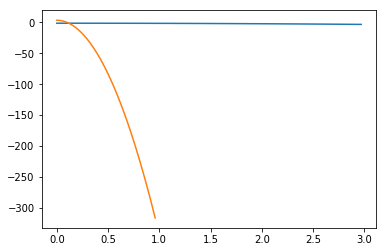

In [11]:
##from mpmath import *
#mp.dps = 15; mp.pretty = True

a,b,c=[2.35,2.4,3.2]   #for epc17-1
#a,b,c=[2.35,2.4,6.6]   #for epc17-2
sig=1
Sig=1/40

N=100;
#U=10.695849883633501 /2
U=3
rr=np.arange(0,U,U/N)
ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
difr=U/N

plot(rr,log10(ndens2))
plot(rr,log10(Ndens2))
#plot(rr[1:],(1/(2*pi*sig**2)**(3/2))*rr[1:]/rr[1:])


Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
print(Exc_e,Exc_p, "agreement to 1E-9")
Norm1= difr*np.trapz(ndens2*rr*rr*4*np.pi)
Norm2= difr*np.trapz(Ndens2*rr*rr*4*np.pi)
print(Norm1)

In [23]:
def EPC_17(a,b,c,sig,Sig):
    
    lamb=(1/(2*np.pi*(Sig)*(sig)))**3
    alphe=1/(1/Sig**2+1/sig**2)
    
    N=100000;
    U=10000
    u=np.arange(0,U,U/N)

    
    
    out= -4*pi*(U/N)*np.trapz((u**2)*lamb*np.exp(-u**2 /(2*alphe) )/ (a-b*np.sqrt(lamb)*np.exp(-u**2 /(4*alphe) )+c*lamb*np.exp(-u**2 /(2*alphe) )))
    return out

def Energy(a,b,c,sig,Sig):
    M=1836.152
    Te=(3/8)*(1/sig**2)
    Tp=(3/8)*(1/Sig**2) /M
    Vcoul=np.sqrt(2/np.pi)/np.sqrt(sig**2 +Sig**2)
    #abc=np.sqrt(4*a*c-b**2)
    #EPC17pre= (-4*(np.pi**(3/2))*(sig**3)*(Sig**3))/(c*abc*((sig**2+Sig**2)**(3/2)))  
    #EPC17_1=(-1j*b+abc)*polylog( 3/2,   (b-1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #EPC17_2=(1j*b+abc)*polylog(  3/2,  (b+1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #SHO=0.5*(0.2*10)*Sig**2
    #EPC17=EPC17pre*(EPC17_1+EPC17_2)
    EPC17=EPC_17(a,b,c,sig,Sig)
    Vautointele=np.sqrt(1/np.pi)/sig
    Vautointprot=np.sqrt(1/np.pi)/Sig
    
    N=100000;
    U=10.695849883633501 /2
    #U=5

    rr=np.arange(0,U,U/N)
    ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
    Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
    difr=U/N
    ndens2[np.where(ndens2<1E-17)]=1E-17
    Ndens2[np.where(Ndens2<1E-17)]=1E-17

    Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
    Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
    
    print(EPC17,'epc')
    print(Vcoul,'vcouk')
    print(Te)
    print(Tp)
    print(Tp+Te,'T')
    return Te+Tp -Vcoul  #+0*real(EPC17)+Exc_p+0.5*Vautointele+0.5*Vautointprot+Exc_e
    #return Exc_p

In [24]:

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(Energy(a,b,c,sig+h,Sig)-Energy(a,b,c,sig-h,Sig))/(2*h)
    Grad2=(Energy(a,b,c,sig,Sig+h)-Energy(a,b,c,sig,Sig-h))/(2*h)
    return np.array([real(Grad1),real(Grad2)])

'''

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)
    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)
    return np.array([Grad1,Grad2])
'''

'\n\ndef gradEnergy(a,b,c,sig,Sig,h):\n    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)\n    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)\n    return np.array([Grad1,Grad2])\n'

In [25]:
sig=1
Sig=1/6
Energy(a,b,c,sig,Sig) #for Sig=1/2 and sig=1 should be -0.43294 For Sig=1/4 sig=1 should be -0.62090, -0.74004


-0.029115955315422756 epc
0.7870284826954251 vcouk
0.375
0.007352332486635093
0.3823523324866351 T


-0.40467615020879005

For $\sigma$=1 and $\Sigma$=1/6  



For python radial integration

Tp=0.3823523324866351
Te= 0.375
T=0.3823523324866351
Vcoul=-0.7870284826954251
EPC=-0.029115955315422756
Tot=-0.40467615020879005

For octave

S=[120,120,120]


T=0.38250
EHart=1.1876
EPC=-0.029118
Exce=-0.23165
Excp=-2.0882
Tot=-0.77886

S=[80,80,80]

For octave
T=0.38242
EHart= 1.1543
EPC=-0.029479
Exce=-0.23165
Excp=-2.0524
Tot=-0.77674

In [29]:

a,b,c=[2.35,2.4,3.2]   #for epc17-1
#a,b,c=[2.35,2.4,6.6]   #for epc17-2
presSig=np.array([1,1/50])

E0= Energy(a,b,c,presSig[0],presSig[1])
print(presSig,E0)

h=1E-5
grad1=gradEnergy(a,b,c,presSig[0],presSig[1],h)

step=0.0001
postsSig=presSig-step*grad1


E1= Energy(a,b,c, real(postsSig[0]), real(postsSig[1]))
delta=abs(E1-E0)
E0=real(E1)

print(postsSig,E1,delta, grad1)


[1.   0.02] -1.7722749105299211
[1.00000241 0.02034501] -1.7731139471842123 0.000839036654291192 [-0.02411788 -3.45014079]


In [30]:

gamma = 1E-4 # Step size multiplier
precision = 1E-6# Desired precision of result
max_iters = 1000  # Maximum number of iterations

# Derivative function

j=0
for i in range(max_iters):
    presSig = postsSig
    postsSig = presSig - gamma * gradEnergy(a,b,c,presSig[0],presSig[1],h)
    step = np.sqrt(np.sum((postsSig - presSig)**2))
    j=j+1
    print(step,Energy(a,b,c, real(postsSig[0]), real(postsSig[1])),real(postsSig[0]), real(postsSig[1]))
    if abs(step) <= precision:
        break
    
print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

0.00014448374929051637 -1.7732655837223703 1.0000048250437423 0.02048947767330887
6.594757807583306e-05 -1.7732975615715123 1.0000072388085748 0.020555381063156446
3.116636136503033e-05 -1.7733047525967702 1.0000096527004168 0.020586453803732568
1.5059454116800119e-05 -1.773306447026588 1.0000120665487113 0.020601318543713703
7.555086016280441e-06 -1.7733068851601672 1.0000144802737978 0.02060847768164507
4.217836186520214e-06 -1.7733070320991686 1.0000168938377865 0.020611936706214067
2.937034917206911e-06 -1.7733071110944003 1.0000193072224786 0.02061361054862985
2.545696534107783e-06 -1.773307174185165 1.000021720419081 0.020614421136688748
2.4447482024632552e-06 -1.7733072335441982 1.0000241334233575 0.020614813825032812
2.4203009656199463e-06 -1.773307292022686 1.000026546233265 0.020615004101449657
2.4143761356054516e-06 -1.7733073502883965 1.0000289588478353 0.02061509631348322
2.41283276720489e-06 -1.7733074084974607 1.000031371266589 0.020615141009339127
2.4123200653490034e-06

2.394637102052986e-06 -1.77331266484995 1.0002500822673746 0.020615185101819904
2.3944425376882057e-06 -1.773312722181183 1.0002524767099121 0.020615185124708262
2.3942480177326012e-06 -1.773312779503085 1.0002548709579298 0.020615185147605502
2.3940534888949576e-06 -1.7733128368156788 1.0002572650114185 0.020615185170484978
2.3938589955847904e-06 -1.7733128941189502 1.000259658870414 0.020615185193382218
2.3936645200377668e-06 -1.7733129514129224 1.000262052534934 0.020615185216252812
2.3934700533732922e-06 -1.773313008697583 1.0002644460049872 0.020615185239176697
2.3932756133530657e-06 -1.7733130659729373 1.0002668392806005 0.02061518526203841
2.393081199978786e-06 -1.7733131232389905 1.0002692323618003 0.020615185284900122
2.3928867954862063e-06 -1.773313180495741 1.0002716252485957 0.020615185307752953
2.392692399875326e-06 -1.7733132377431815 1.0002740179409955 0.02061518533058802
2.3924980397919213e-06 -1.7733132949813228 1.0002764104390351 0.02061518535344085
2.392303679708008e

2.374887628883888e-06 -1.7733184649324034 1.0004933165274768 0.020615187425125896
2.3746949474572727e-06 -1.7733185213218796 1.000495691222424 0.02061518744779221
2.3745022926759257e-06 -1.7733185777021987 1.0004980657247167 0.020615187470422996
2.3743096645405237e-06 -1.7733186340733749 1.000500440034381 0.020615187493080427
2.3741170452869067e-06 -1.7733186904354135 1.0005028141514263 0.020615187515764504
2.3739244349144802e-06 -1.7733187467882932 1.000505188075861 0.020615187538413054
2.373731851187745e-06 -1.7733188031320388 1.0005075618077122 0.020615187561061604
2.373539285225343e-06 -1.7733188594666398 1.0005099353469973 0.02061518758379009
2.3733467370245574e-06 -1.7733189157920926 1.0005123086937342 0.02061518760639423
2.3731541977073366e-06 -1.7733189721084202 1.0005146818479318 0.020615187629060543
2.372961693916151e-06 -1.7733190284156155 1.0005170548096256 0.020615187651673566
2.3727691990078517e-06 -1.773319084713659 1.0005194275788245 0.02061518767434876
2.37257672186176

2.355519264192628e-06 -1.773324114332194 1.000732190830961 0.020615189704520347
2.3553284124139813e-06 -1.7733241698056688 1.0007345461593733 0.02061518972699126
2.355137596162132e-06 -1.7733242252701515 1.0007369012969694 0.020615189749444412
2.354946788792152e-06 -1.7733242807256389 1.000739256243758 0.02061518977188868
2.3547559991859094e-06 -1.773324336172152 1.0007416109997571 0.02061518979434183
2.354565227343405e-06 -1.7733243916096804 1.0007439655649844 0.020615189816821627
2.3543744821457445e-06 -1.7733244470382274 1.0007463199394664 0.020615189839274777
2.354183745830123e-06 -1.7733245024577915 1.0007486741232121 0.020615189861727928
2.3539930361595145e-06 -1.7733245578683885 1.0007510281162482 0.02061518988414555
2.3538023442529827e-06 -1.7733246132699918 1.0007533819185923 0.020615189906580938
2.35361167011002e-06 -1.7733246686626263 1.0007557355302623 0.02061518992903409
2.3534210048484176e-06 -1.7733247240462902 1.000758088951267 0.020615189951460593
2.3532303662326757e-0

2.3363351876423413e-06 -1.7733296720240066 1.0009691183467986 0.020615191963193596
2.3361461743932778e-06 -1.7733297265975878 1.0009714544929729 0.0206151919855224
2.3359571611427734e-06 -1.7733297811623476 1.000973790450134 0.020615192007744625
2.335768165656854e-06 -1.7733298357182612 1.0009761262182995 0.02061519202996685
2.335579196817134e-06 -1.773329890265364 1.0009784617974962 0.02061519205227789
2.3353902368571667e-06 -1.7733299448036295 1.000980797187733 0.020615192074464588
2.3352012857810986e-06 -1.77332999933307 1.0009831323890186 0.020615192096748985
2.335012379112344e-06 -1.7733300538536962 1.0009854674013976 0.020615192118962327
2.3348234813261357e-06 -1.7733301083654887 1.0009878022248788 0.02061519214118455
2.334634601303664e-06 -1.7733301628684774 1.00099013685948 0.02061519216343342
2.334445730162893e-06 -1.7733302173626342 1.00099247130521 0.020615192185700053
2.3342568767853513e-06 -1.7733302718479926 1.0009948055620868 0.020615192207948923
2.3340680411714626e-06 -

2.3173332676035503e-06 -1.7733351396193555 1.0012041175791744 0.02061519420142986
2.3171460395925165e-06 -1.773335193308835 1.0012064347252139 0.020615194223465565
2.316958820463521e-06 -1.7733352469896513 1.0012087516840342 0.020615194245510154
2.3167716102166483e-06 -1.7733353006617758 1.0012110684556443 0.02061519426759915
2.3165844443781887e-06 -1.7733353543252566 1.0012133850400886 0.020615194289679267
2.316397269657353e-06 -1.773335407980051 1.0012157014373582 0.020615194311688328
2.316210130464584e-06 -1.7733354616261767 1.0012180176474885 0.020615194333724034
2.316022991271224e-06 -1.7733355152636374 1.0012203336704797 0.020615194355724214
2.315835887606608e-06 -1.7733355688924188 1.0012226495063672 0.02061519437785762
2.315648801703359e-06 -1.7733356225125494 1.0012249651551688 0.020615194399893327
2.3154617158008733e-06 -1.7733356761240149 1.0012272806168845 0.02061519442191127
2.3152746565440773e-06 -1.7733357297268153 1.001229595891541 0.020615194443946976
2.315087606168981

2.298325876385779e-06 -1.7733405715192934 1.0014395051400395 0.020615196441176025
2.298140415850223e-06 -1.7733406243316576 1.0014418032804553 0.020615196463034096
2.2979549819600203e-06 -1.7733406771354954 1.0014441012354371 0.020615196484918812
2.297769565832709e-06 -1.7733407299308066 1.0014463990050029 0.02061519650675912
2.297584185233296e-06 -1.773340782717609 1.001448696589188 0.020615196528634954
2.2973988046332064e-06 -1.773340835495894 1.0014509939879925 0.02061519655047526
2.2972134506783015e-06 -1.7733408882656612 1.001453291201443 0.020615196572262278
2.2970281144878926e-06 -1.7733409410269108 1.0014555882295575 0.020615196594093704
2.296842787179438e-06 -1.7733409937796498 1.0014578850723446 0.0206151966159873
2.296657486515322e-06 -1.7733410465238784 1.001460181729831 0.02061519663783649
2.2964721858516283e-06 -1.7733410992596035 1.0014624782020167 0.02061519665968568
2.2962869118330336e-06 -1.7733411519868056 1.0014647744889285 0.020615196681508224
2.2961016644600452e-0

2.2794998423201094e-06 -1.7733459147373427 1.001672963305408 0.020615198660529615
2.279316175904539e-06 -1.7733459666880673 1.0016752426215838 0.020615198682183405
2.279132500607607e-06 -1.7733460186304235 1.0016775217540843 0.02061519870386384
2.2789488608373887e-06 -1.7733460705644148 1.001679800702945 0.02061519872552651
2.2787652388307394e-06 -1.7733461224900289 1.0016820794681838 0.02061519874717142
2.278581643470034e-06 -1.7733461744072816 1.0016843580498271 0.020615198768860737
2.278398030344494e-06 -1.773346226316173 1.0016866364478574 0.020615198790461236
2.278214452747609e-06 -1.7733462782166765 1.00168891466231 0.02061519881213279
2.2780309017951486e-06 -1.77334633010884 1.0016911926932117 0.020615198833777697
2.277847368606089e-06 -1.7733463819926332 1.0016934705405802 0.020615198855378197
2.277663844299825e-06 -1.773346433868074 1.0016957482044244 0.020615198877040868
2.2774803288745014e-06 -1.7733464857351482 1.0016980256847532 0.020615198898676895
2.2772968489763992e-06 

2.2608530693044577e-06 -1.7733511708382892 1.0019045104661153 0.020615200859739318
2.2606711437188432e-06 -1.7733512219425744 1.001906771137259 0.020615200881215472
2.2604892181329756e-06 -1.7733512730386387 1.001909031626477 0.020615200902673863
2.2603073191924605e-06 -1.7733513241264713 1.001911291933796 0.02061520092411449
2.2601254380152618e-06 -1.7733513752060848 1.001913552059234 0.020615200945510708
2.25994358348451e-06 -1.7733514262774772 1.0019158120028173 0.02061520096697798
2.259761728953e-06 -1.7733514773406505 1.0019180717645462 0.02061520098843637
2.2595799010669276e-06 -1.7733515283956116 1.0019203313444471 0.020615201009894762
2.2593980820623018e-06 -1.7733515794423624 1.001922590742529 0.020615201031317625
2.2592162985854026e-06 -1.7733516304808905 1.0019248499588276 0.020615201052767134
2.259034515108082e-06 -1.7733516815111994 1.0019271089933426 0.02061520107419888
2.2588527671581516e-06 -1.7733517325333086 1.0019293678461096 0.020615201095639506
2.2586710192082207e-

2.242383416829424e-06 -1.7733563413564681 1.0021341647955264 0.020615203038920598
2.2422032143091017e-06 -1.7733563916292 1.0021364069987406 0.020615203060121417
2.2420230206719097e-06 -1.7733564418938546 1.0021386490217612 0.020615203081384408
2.241842853679229e-06 -1.7733564921504232 1.0021408908646148 0.020615203102620754
2.2416626866874753e-06 -1.7733565423989273 1.0021431325273014 0.020615203123928155
2.2414825552216782e-06 -1.7733565926393453 1.0021453740098565 0.020615203145182264
2.241302441519871e-06 -1.7733566428716916 1.002147615312298 0.020615203166427492
2.2411223367003537e-06 -1.7733566930959679 1.0021498564346345 0.02061520318771713
2.2409422585250094e-06 -1.7733567433121813 1.002152097376893 0.02061520320892683
2.240762189232966e-06 -1.7733567935203016 1.002154338139082 0.020615203230216466
2.2405821288211897e-06 -1.7733568437203662 1.0021565787212108 0.020615203251426167
2.240402086174583e-06 -1.7733568939123643 1.0021588191232969 0.020615203272724685
2.240222070171559

In [103]:
%pylab inline
a=2.35; b=2.4; c=3.2;
sig=1
Sig=1/2 *1E-5
pre=1/(2*pi*sig*Sig)**3
al=0.5*(1/sig**2+1/Sig**2)

N=10000
U=1000
u=np.arange(0,U,U/N)


out=-4*np.pi*pre*al**(-1.5)*sum( (u**2 *exp(-u**2))/(a-b*sqrt(pre*exp(-u**2))+c*pre*exp(-u**2)) )*U/N;
print(out,Energy(a,b,c,sig,Sig))

Populating the interactive namespace from numpy and matplotlib


NameError: name 'Energy' is not defined

Populating the interactive namespace from numpy and matplotlib


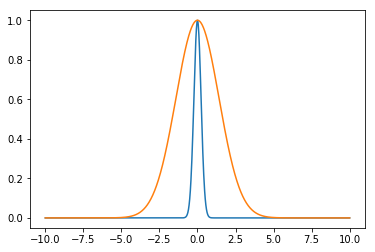

In [16]:
%pylab inline
cx=np.linspace(-10,10,1000)
plot(cx,np.exp(-0.5*cx**2 /(2*(1/6)**2) ))
plot(cx,np.exp(-0.5*cx**2 /(2*(1)**2) ))

In [8]:
#do not erase, converged calculation for the epc functional 

print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

Minimum at [0.960089147599263 0.185027812603674] With energy -0.427957172507869  within 10000 iterations


In [ ]:
 ssig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
ssig =  6.043304402648485
octave:38> sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =    6.303874680199510e-01


sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  1.261719557959719
octave:49> sSig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  6.116323678266423